# MAIN NOTEBOOK

Data import and Data cleaning

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set a nice style for our plots
sns.set_style("whitegrid")


In [36]:
# --- 1. Load the Raw Data ---
df_raw = pd.read_csv(
    "Ultimos 12 meses_N2024.csv",
    encoding="latin-1",
    sep=';',
    header=None,
    skiprows=3
)

# --- 2. Define Headers ---
location_headers = ['COD (NUTS2024)', 'Designação']
time_headers = [
    '1ºT2025', '4ºT 2024', '3ºT2024', '2ºT2024', '1ºT2024', '4ºT 2023',
    '3ºT2023', '2ºT2023', '1ºT2023', '4ºT 2022', '3ºT 2022', '2ºT2022',
    '1ºT 2022', '4ºT 2021', '3ºT 2021', '2ºT 2021', '1ºT 2021', '4ºT 2020',
    '3ºT 2020', '2ºT 2020', '1ºT 2020', '4ºT 2019'
]
full_headers = location_headers + time_headers

# --- 3. Extract and Build the Median DataFrame ---
df_median = pd.concat([
    df_raw.iloc[:, 0:2],
    df_raw.iloc[:, 25:47]
], axis=1)
df_median.columns = full_headers

# --- 4. Clean and Convert Data Types ---
# Convert time columns to numeric
for col in time_headers:
    cleaned_series = df_median[col].astype(str).str.replace(' ', '', regex=False).replace('//', np.nan, regex=False)
    df_median[col] = pd.to_numeric(cleaned_series, errors='coerce')

# --- 5. Impute Missing Values (Targeted Interpolation) ---
print("\n--- Applying targeted interpolation... ---")
# Select only the numeric time columns for interpolation
numeric_data = df_median[time_headers].interpolate(method='linear', axis=1, limit_direction='both')
# Fill any remaining NaNs (usually start/end)
numeric_data.fillna(method='ffill', axis=1, inplace=True)
numeric_data.fillna(method='bfill', axis=1, inplace=True)

# Put the imputed numeric data back into the main DataFrame
df_median[time_headers] = numeric_data

# --- 6. Final Setup ---
# Remove footer rows
df_median.dropna(subset=['Designação'], inplace=True)
# Set the index
df_median.set_index('Designação', inplace=True)

# --- 7. Verify the Final Result ---
print("\n--- Final Check for Missing Values ---")
print(f"Total remaining NaNs: {df_median.isnull().sum().sum()}") # Should be 0

print("\n--- Cleaned & Imputed DataFrame Head ---")
df_median.head()


--- Applying targeted interpolation... ---

--- Final Check for Missing Values ---
Total remaining NaNs: 66

--- Cleaned & Imputed DataFrame Head ---


C:\Users\Utilizador\AppData\Local\Temp\ipykernel_6280\4103833936.py:38: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  numeric_data.fillna(method='ffill', axis=1, inplace=True)
C:\Users\Utilizador\AppData\Local\Temp\ipykernel_6280\4103833936.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  numeric_data.fillna(method='bfill', axis=1, inplace=True)


,COD (NUTS2024),1ºT2025,4ºT 2024,3ºT2024,2ºT2024,1ºT2024,4ºT 2023,3ºT2023,2ºT2023,1ºT2023,...,1ºT 2022,4ºT 2021,3ºT 2021,2ºT 2021,1ºT 2021,4ºT 2020,3ºT 2020,2ºT 2020,1ºT 2020,4ºT 2019
Designação,,,,,,,,,,,,,,,,,,,,,
Portugal,PT,1845.0,1777.0,1709.0,1661.0,1633.0,1611.0,1579.0,1541.0,1509.0,...,1346.0,1297.0,1251.0,1218.0,1197.0,1190.0,1167.0,1146.0,1127.0,1094.0
Continente,1,1846.0,1778.0,1714.0,1667.0,1638.0,1618.0,1587.0,1550.0,1519.0,...,1351.0,1301.0,1257.0,1222.0,1200.0,1195.0,1169.0,1150.0,1131.0,1096.0
Norte,11,1621.0,1558.0,1492.0,1449.0,1417.0,1394.0,1367.0,1331.0,1304.0,...,1169.0,1133.0,1108.0,1079.0,1065.0,1047.0,1019.0,1000.0,977.0,948.0
Alto Minho,111,1313.0,1248.0,1193.0,1158.0,1124.0,1108.0,1091.0,1077.0,1073.0,...,972.0,945.0,925.0,895.0,893.0,891.0,870.0,865.0,853.0,846.0
Arcos de Valdevez,1111601,960.0,958.0,1000.0,998.0,828.0,813.0,766.0,754.0,760.0,...,690.0,635.0,680.0,705.0,740.0,794.0,711.0,726.0,693.0,672.0


In [37]:
# Drop rows where all time columns are NaN
df_median_final = df_median.dropna(subset=time_headers, how='all')

# Verify that all NaNs are gone
print("\n--- Final Check after Dropping ---")
print(f"Total remaining NaNs: {df_median_final.isnull().sum().sum()}") # Should now be 0

print("\n--- Final DataFrame Head ---")
df_median_final.head()

# You can now save this truly final DataFrame if needed
df_median_final.to_csv('final_median_prices.csv', sep=';', encoding='latin-1', index=True)


--- Final Check after Dropping ---
Total remaining NaNs: 0

--- Final DataFrame Head ---


In [38]:
df_median.dropna(subset=time_headers, how='all', inplace=True)

# Verify that all NaNs are gone
print("\n--- Final Check after Dropping All-NaN Rows ---")
print(f"Total remaining NaNs: {df_median.isnull().sum().sum()}") # Should be 0 now

print("\n--- Final DataFrame Head ---")
df_median.head()


--- Final Check after Dropping All-NaN Rows ---
Total remaining NaNs: 0

--- Final DataFrame Head ---


,COD (NUTS2024),1ºT2025,4ºT 2024,3ºT2024,2ºT2024,1ºT2024,4ºT 2023,3ºT2023,2ºT2023,1ºT2023,...,1ºT 2022,4ºT 2021,3ºT 2021,2ºT 2021,1ºT 2021,4ºT 2020,3ºT 2020,2ºT 2020,1ºT 2020,4ºT 2019
Designação,,,,,,,,,,,,,,,,,,,,,
Portugal,PT,1845.0,1777.0,1709.0,1661.0,1633.0,1611.0,1579.0,1541.0,1509.0,...,1346.0,1297.0,1251.0,1218.0,1197.0,1190.0,1167.0,1146.0,1127.0,1094.0
Continente,1,1846.0,1778.0,1714.0,1667.0,1638.0,1618.0,1587.0,1550.0,1519.0,...,1351.0,1301.0,1257.0,1222.0,1200.0,1195.0,1169.0,1150.0,1131.0,1096.0
Norte,11,1621.0,1558.0,1492.0,1449.0,1417.0,1394.0,1367.0,1331.0,1304.0,...,1169.0,1133.0,1108.0,1079.0,1065.0,1047.0,1019.0,1000.0,977.0,948.0
Alto Minho,111,1313.0,1248.0,1193.0,1158.0,1124.0,1108.0,1091.0,1077.0,1073.0,...,972.0,945.0,925.0,895.0,893.0,891.0,870.0,865.0,853.0,846.0
Arcos de Valdevez,1111601,960.0,958.0,1000.0,998.0,828.0,813.0,766.0,754.0,760.0,...,690.0,635.0,680.0,705.0,740.0,794.0,711.0,726.0,693.0,672.0


In [42]:
df_median.to_csv("test.csv")

In [41]:
# --- 1. Load the Data ---
# Load the CSV file into a pandas DataFrame
file_path = '582.csv' 
# FIX: Specify the encoding to correctly read special characters (like 'ã' and 'â')
df = pd.read_csv(file_path, encoding='utf-8') 

print("--- Original Data (First 5 Rows) ---")
print(df.head())
print("\n--- Original Data Info ---")
df.info()


# --- 2. Rename and Drop Unnecessary Columns ---
# Define clearer, more "Python-friendly" column names
new_column_names = {
    '01. Ano': 'Year',
    '02. Nome Região (Portugal)': 'Region',
    '03. Âmbito Geográfico': 'Scope',
    '04. Filtro 1': 'Education_Level',
    '08. Símbolo': 'Symbol',
    '07. Escala': 'Unit',
    '09. Valor': 'Value'
}

# Apply the new names
# This will now work because the column names from the file are read correctly
df_cleaned = df.rename(columns=new_column_names)

# Drop the columns that were completely empty (0 non-null values)
df_cleaned = df_cleaned.drop(columns=['05. Filtro 2', '06. Filtro 3'], errors='ignore')

print("\n--- Data After Renaming and Dropping Columns ---")
print(df_cleaned.head())


# --- 3. Handle Missing Values ---
# We can't use rows where the income 'Value' is missing.
df_cleaned = df_cleaned.dropna(subset=['Value'])

# We also need to drop rows where key identifiers are missing
# This line will now work because 'Region' and 'Scope' exist
df_cleaned = df_cleaned.dropna(subset=['Year', 'Region', 'Scope', 'Education_Level'])


# --- 4. Correct Data Types ---
# 'Year' was loaded as a float (e.g., 2023.0), let's convert it to an integer (2023)
df_cleaned['Year'] = df_cleaned['Year'].astype(int)

print(f"\nUnique 'Year' values after type conversion: {df_cleaned['Year'].unique()}")


# --- 5. Filter for Relevant Scope ---
# The file contains data for 'Portugal' (national) and 'Município' (municipal).
# For your project, you need to merge with housing data, so we'll keep only the 'Município' data.
df_municipal = df_cleaned[df_cleaned['Scope'] == 'Município'].copy()

print(f"\nUnique 'Scope' values after filtering: {df_municipal['Scope'].unique()}")


# --- 6. Create Final Datasets ---

# DataFrame 1: Total Average Income (for your main project questions)
# This file is ready to be merged with your housing price data.
# We filter for rows where 'Education_Level' is 'Total'.
df_total_income = df_municipal[df_municipal['Education_Level'] == 'Total'].copy()

print("\n--- Final 'Total Income' DataFrame (Head) ---")
print(df_total_income.head())


# DataFrame 2: Average Income by Education Level (for advanced analysis)
# This file has the detailed breakdown, excluding the 'Total' row.
df_education_income = df_municipal[df_municipal['Education_Level'] != 'Total'].copy()

print("\n--- Final 'Income by Education' DataFrame (Head) ---")
print(df_education_income.head())


# --- 7. Save the Cleaned Files ---
# Save the new, clean DataFrames to CSV files for your project
df_total_income.to_csv('total_average_income_by_municipality.csv', index=False)
df_education_income.to_csv('average_income_by_education.csv', index=False)

print("\nCleaning complete! Two files saved:")
print("1. total_average_income_by_municipality.csv (for your main analysis)")
print("2. average_income_by_education.csv (for detailed education analysis)")

--- Original Data (First 5 Rows) ---
   01. Ano 02. Nome Região (Portugal) 03. Âmbito Geográfico  \
0   2013.0                   Portugal                   NaN   
1   2013.0                   Portugal                   NaN   
2   2013.0                   Portugal                   NaN   
3   2013.0                   Portugal                   NaN   
4   2013.0                   Portugal                   NaN   

                04. Filtro 1  05. Filtro 2  06. Filtro 3 08. Símbolo  \
0  01. Inferior ao 1.º ciclo           NaN           NaN           x   
1      02. Básico - 1º Ciclo           NaN           NaN           x   
2      03. Básico - 2º Ciclo           NaN           NaN           x   
3      04. Básico - 3º Ciclo           NaN           NaN           x   
4             05. Secundário           NaN           NaN           x   

  07. Escala  09. Valor  
0      euros        NaN  
1      euros        NaN  
2      euros        NaN  
3      euros        NaN  
4      euros        N

EDA

In [45]:
df_education_income.head()
df_education_income.info()

print(df_education_income['Value'].describe())

<class 'pandas.core.frame.DataFrame'>
Index: 27732 entries, 121 to 37386
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             27732 non-null  int64  
 1   Region           27732 non-null  object 
 2   Scope            27732 non-null  object 
 3   Education_Level  27732 non-null  object 
 4   Symbol           0 non-null      object 
 5   Unit             27732 non-null  object 
 6   Value            27732 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 1.7+ MB
count    27732.000000
mean      1156.821405
std        492.024660
min          0.000000
25%        823.600000
50%       1000.100000
75%       1378.600000
max       9670.900000
Name: Value, dtype: float64


### What this plot shows
This set of box plots shows the full distribution of incomes for each year from **2015 to 2023**.

---

### Analysis

- We see a clear upward trend. Not only is the **median income** (the center line in each box) rising, but the entire “box” (the 25th to 75th percentile) moves up each year.  
- This confirms that the income growth seen in the **line chart** is happening across the board, not just for a few municipalities.  
- Notice the “dots” above the boxes, especially in later years. These are **outliers** — the handful of very high-income municipalities we saw before. This shows that **income disparity persists** over time.


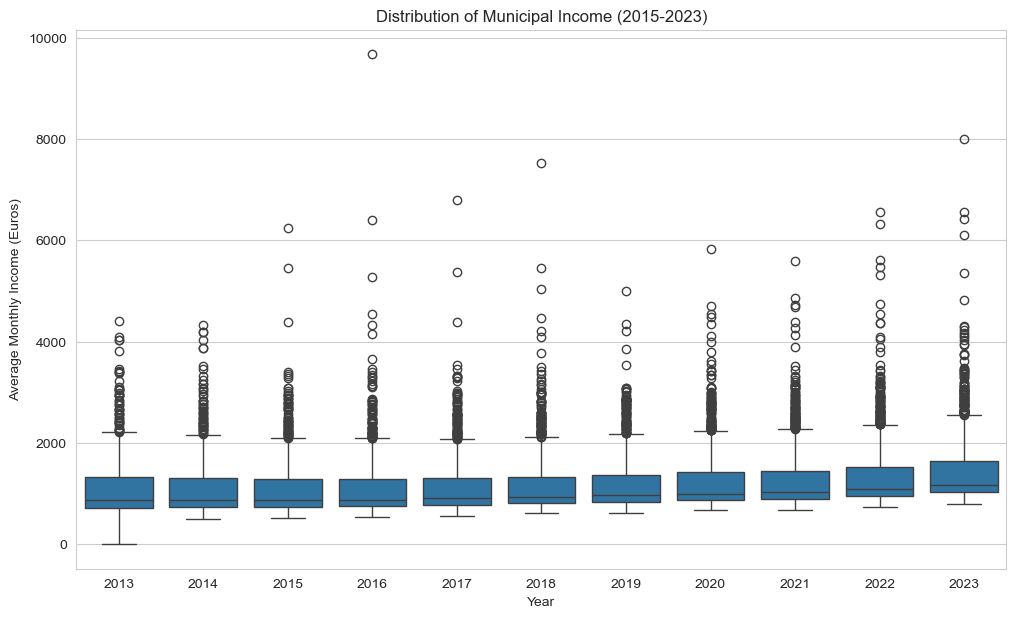

In [50]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_education_income, x='Year', y='Value')

plt.title('Distribution of Municipal Income (2015-2023)')
plt.xlabel('Year')
plt.ylabel('Average Monthly Income (Euros)')
plt.show()

### What this shows
These tables list the **10 highest** and **10 lowest-income municipalities**, based on their **average income** over the entire **2015–2023** period.

---

### Analysis

- This confirms the *“usual suspects.”* We see **Lisboa**, **Oeiras**, and **Porto** are not just rich in one year, but are consistently the **highest-income areas** in the country.  
- Similarly, municipalities like **Penedono** and **Mondim de Basto** appear at the bottom, showing a **persistent lack of high average income**.  
- These **consistent rankings** are more robust for analysis than the **single-year snapshot**.


In [51]:
# Calculate the average income for each municipality across all years
df_consistent_avg = df_education_income.groupby('Region')['Value'].mean().reset_index()

print("\n--- Top 10 Consistently Highest-Income Municipalities (Avg. 2015-2023) ---")
top_10_consistent = df_consistent_avg.sort_values('Value', ascending=False).head(10)
print(top_10_consistent)

print("\n--- Bottom 10 Consistently Lowest-Income Municipalities (Avg. 2015-2023) ---")
bottom_10_consistent = df_consistent_avg.sort_values('Value', ascending=True).head(10)
print(bottom_10_consistent)


--- Top 10 Consistently Highest-Income Municipalities (Avg. 2015-2023) ---
            Region        Value
298  Vila do Porto  2623.422581
243          Sines  2132.132039
70    Castro Verde  2125.857609
7        Alcochete  1889.587234
171         Oeiras  1757.379245
181        Palmela  1642.438679
121         Lisboa  1640.638679
207    Porto Santo  1622.801299
265          Trofa  1587.866038
78      Constância  1557.198718

--- Bottom 10 Consistently Lowest-Income Municipalities (Avg. 2015-2023) ---
                       Region       Value
191                  Penedono  846.433333
215                   Resende  874.233784
52        Cabeceiras de Basto  880.977011
100  Freixo de Espada à Cinta  887.013793
295               Vila de Rei  888.007895
167                      Nisa  894.854651
136                    Marvão  895.770769
41                  Barrancos  895.945455
248                     Sátão  896.243023
72          Celorico de Basto  898.047312


### What this plot shows
This line graph tracks the **average monthly income** across all municipalities from **2015 to 2023**.

---

### Analysis

- This plot confirms the story from our **box plot**: there is a **clear and steady upward trend** in the national average.  
- This is the **“big picture”** trend we will compare against the **“big picture” trend of housing prices**.  
- The next plot will **break this single line down** to see if this growth is **uniform**.


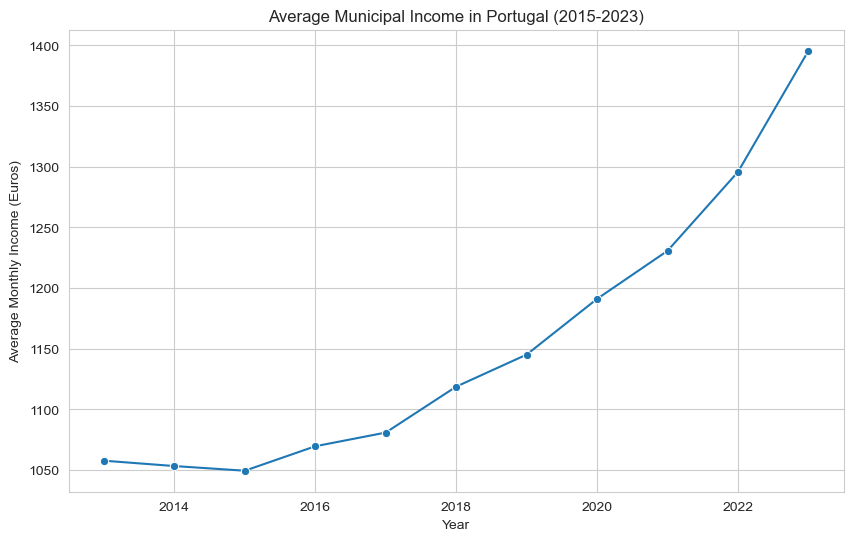

In [54]:
# We group by 'Year' and get the mean of ALL municipalities for that year.
df_avg_by_year = df_education_income.groupby('Year')['Value'].mean().reset_index()

# Plot 2: Line Chart (Evolution)
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_avg_by_year, x='Year', y='Value', marker='o')

plt.title('Average Municipal Income in Portugal (2015-2023)')
plt.xlabel('Year')
plt.ylabel('Average Monthly Income (Euros)')
plt.show()

### What this plot shows
This graph tracks the **individual income paths** for **Lisboa**, **Porto**, and the **consistently highest and lowest-income municipalities**.

---

### Analysis

- The **gap is widening.** While all lines are trending up, the lines for **Lisboa** and **Oeiras** are steeper than the line for **Penedono** (or other low-income areas).  
- This means that in **absolute terms**, high-income areas are gaining **more euros per month each year** than low-income areas.  
- This is a **key insight** for your project: **affordability isn’t just one number; it’s a diverging story.**  
  The affordability challenge in **Lisboa** (where incomes are high, but housing is likely very high) is fundamentally different from the challenge in **Penedono** (where both incomes and housing are low).


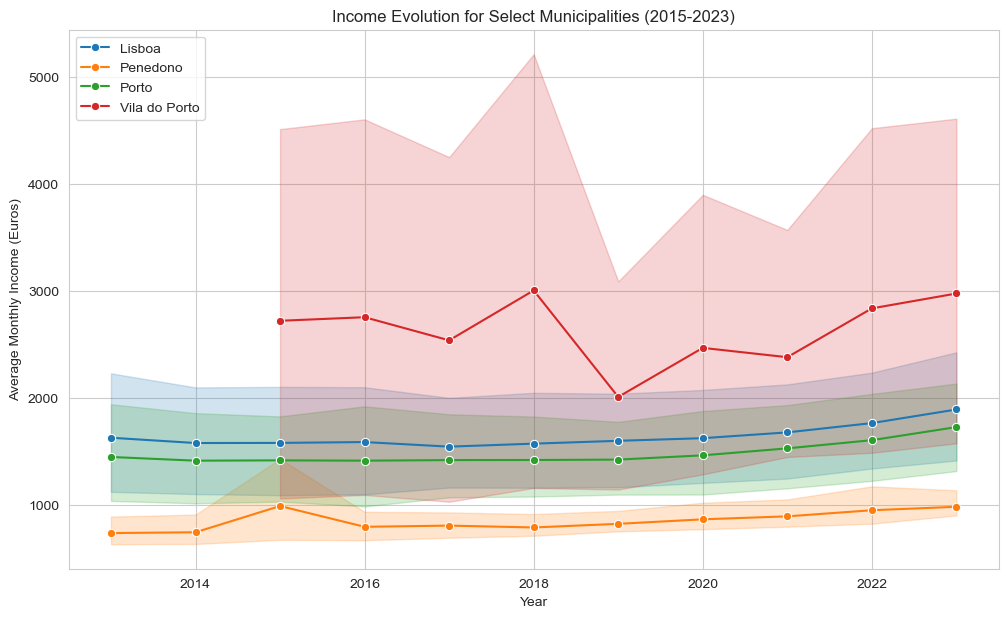

In [55]:
# Let's get the names from the 'consistent' DataFrames we just made
richest_name = top_10_consistent['Region'].iloc[0]
poorest_name = bottom_10_consistent['Region'].iloc[0]

# We'll plot Lisboa, Porto, and the #1 most/least wealthy from our consistent list
mun_to_compare = ['Lisboa', 'Porto', richest_name, poorest_name]
df_compare = df_education_income[df_education_income['Region'].isin(mun_to_compare)]

plt.figure(figsize=(12, 7))
sns.lineplot(data=df_compare, x='Year', y='Value', hue='Region', marker='o')

plt.title(f"Income Evolution for Select Municipalities (2015-2023)")
plt.xlabel('Year')
plt.ylabel('Average Monthly Income (Euros)')
plt.legend()
plt.show()